## NE 155- Homework 3 Plots
### Laura Shi
#### Due: March 1, 2021

In [1]:
import numpy as np
import pandas as pd
import math
import scipy as sc
from scipy import interpolate
from scipy.interpolate import interp1d, lagrange
import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

%matplotlib inline
plt.style.use('fivethirtyeight')

### Question 1

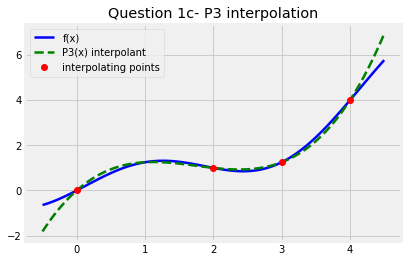

In [2]:
#Question 1c

#f(x) actual function 
def f(x):
    return np.sin((math.pi/2)*x) + (x**2)/4

#interoplant function P3(x)
def P3(x, x0, x1, x2, x3):
    L0 = ((x-x1)*(x-x2)*(x-x3))/ ((x0-x1)*(x0-x2)*(x0-x3))
    L1 = ((x-x0)*(x-x2)*(x-x3))/ ((x1-x0)*(x1-x2)*(x1-x3))
    L2 = ((x-x0)*(x-x1)*(x-x3))/ ((x2-x0)*(x2-x1)*(x2-x3))
    L3 = ((x-x0)*(x-x1)*(x-x2))/ ((x3-x0)*(x3-x1)*(x3-x2))
    P3 = f(x0)*L0 + f(x1)*L1 + f(x2)*L2 + f(x3)*L3 
    return P3

xvals = np.linspace(-0.5, 4.5, 100)
x0, x1, x2, x3 = 0, 2, 3, 4
xpoints = np.array([x0, x1, x2, x3])

plt.plot(xvals, f(xvals), color = 'b', label = 'f(x)', linewidth = 2.5);
plt.plot(xvals, P3(xvals, x0, x1, x2, x3), color = 'g', linestyle = '--', label = 'P3(x) interpolant', linewidth = 2.5);
plt.plot(xpoints, P3(xpoints, x0, x1, x2, x3),  'ro', label = 'interpolating points');
plt.title('Question 1c- P3 interpolation')
plt.legend();

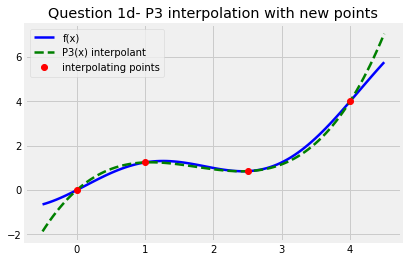

In [3]:
#Question 1d, repeating part c with same code but passing in new interpolating points

x0, x1, x2, x3 = 0, 1, 2.5, 4
xpoints = np.array([x0, x1, x2, x3])

plt.plot(xvals, f(xvals), color = 'b', label = 'f(x)', linewidth = 2.5);
plt.plot(xvals, P3(xvals, x0, x1, x2, x3), color = 'g', linestyle = '--', label = 'P3(x) interpolant', linewidth = 2.5);
plt.plot(xpoints, P3(xpoints, x0, x1, x2, x3),  'ro', label = 'interpolating points');
plt.title('Question 1d- P3 interpolation with new points')
plt.legend();

**Observations from part d vs part c:**

Visually, it appears that the interpoolation from part d leads to a better fit since the points used are equally spaced out throughout the range of the graph thus producing to a more "symmetric" fit compared to that of part c. However, it is important to note that generally equally-spaced points don't work well with respect to minimizing the error (?, pg 4 of topic 6-7 notes)

### Question 2c- TO REVISIT

Finding a bound for the error expression for the function:
$$f(x) = \text{sin}(\frac{\pi}{2}x) + \frac{x^2}{4}$$

With the expression
$$err(x) = |f(x) - P_3(x)|$$

Where:
$$P_3(x) = f(x_0)L_0(x) + f(x_1)L_1(x) + f(x_2)L_2(x)+ f(x_3)L_3(x)$$
And the Lagrange polynomial is given by
$$L_{k}(x) = \prod_{i = 0, \space i\ne k}^{n}\frac{(x-x_i)}{(x_k - x_i)}$$

In [23]:
def f(x):
    return np.sin((math.pi/2)*x) + (x**2)/4

def P3(x, x0, x1, x2, x3):
    L0 = ((x-x1)*(x-x2)*(x-x3))/ ((x0-x1)*(x0-x2)*(x0-x3))
    L1 = ((x-x0)*(x-x2)*(x-x3))/ ((x1-x0)*(x1-x2)*(x1-x3))
    L2 = ((x-x0)*(x-x1)*(x-x3))/ ((x2-x0)*(x2-x1)*(x2-x3))
    L3 = ((x-x0)*(x-x1)*(x-x2))/ ((x3-x0)*(x3-x1)*(x3-x2))
    P3 = f(x0)*L0 + f(x1)*L1 + f(x2)*L2 + f(x3)*L3 
    return P3

xvals = np.linspace(-0.5, 4.5, 100)
x0, x1, x2, x3 = 0, 2, 3, 4
xpoints = np.array([x0, x1, x2, x3])

err = f(xvals) - P3(xvals, x0, x1, x2, x3)
px.line(x = xvals, y = err) #not sure where we can bound the error and if using correct x interval?

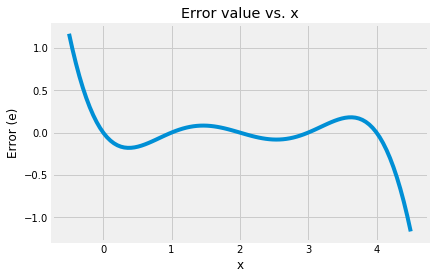

In [22]:
#using matplot lib instead of plotly so renders in github
plt.plot(xvals, err);
plt.title('Error value vs. x');
plt.xlabel('x');
plt.ylabel('Error (e)');

### Question 3- Using built-in interpolation functions

In [5]:
#3a, interpolation
x = np.array([1, 2, 3, 4, 5, 6, 7])
fx = np.array([1, 4, 10, 12, 5, 4, 0])

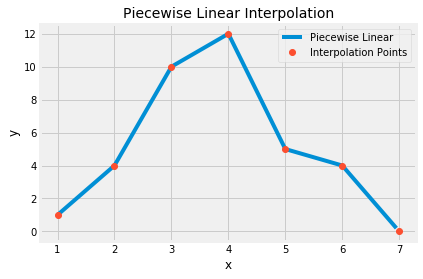

In [6]:
#piecewise linear interpolation
xplot = np.arange(1, 7, 0.05)
lin_inter = interp1d(x, fx)
plt.plot(xplot, lin_inter(xplot), '-', x, fx, 'o');
plt.legend(['Piecewise Linear', 'Interpolation Points']);
plt.xlabel('x'), plt.ylabel('y');
plt.title('Piecewise Linear Interpolation', fontsize = 14);

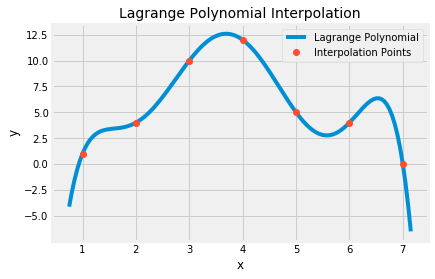

In [7]:
#Lagrange polynomial interpolation
xplot = np.arange(.75, 7.2, 0.05) #adjusted bounds so went through all the points
lg_func = lagrange(x, fx)
plt.plot(xplot, lg_func(xplot), '-', x, fx, 'o');
plt.legend(['Lagrange Polynomial', 'Interpolation Points']);
plt.xlabel('x'), plt.ylabel('y');
plt.title('Lagrange Polynomial Interpolation', fontsize = 14);

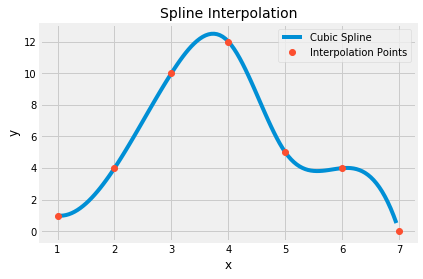

In [8]:
#(Cubic) Spline interpolation
xplot = np.arange(1, 7, 0.05) #adjusted bounds so went through all the points
spline_func = interp1d(x, fx, kind = 'cubic')
plt.plot(xplot, spline_func(xplot), '-', x, fx, 'o');
plt.legend(['Cubic Spline', 'Interpolation Points']);
plt.xlabel('x'), plt.ylabel('y');
plt.title('Spline Interpolation', fontsize = 14);

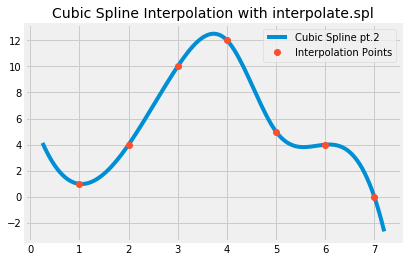

In [9]:
#cubic spline using different method-> almost identical graph but allows for limits not at the endpoints
xplot = np.arange(.25, 7.25, 0.05)
plt.plot(xplot, interpolate.splev(xplot, tck = interpolate.splrep(x, fx, s=0), der = 0), label = 'Cubic Spline pt.2');
plt.plot(x, fx, 'o', label = 'Interpolation Points');
plt.legend();
plt.title('Cubic Spline Interpolation with interpolate.spl', fontsize = 14);

**3b. Discussion of differences between interpolations**

It can be observed that the (cubic) spline interpolations produce the "smoothest" functions in between the points compared to that of the Lagrange interpolation and the piecewise linear interpolation.

Notably, for the Lagrange interpolation, one can observe that between points x = 6 and x = 7, there is both a significant increase and decrease in slope, even though there is no point that would justify such a fit.

### Question 4- Error Plot

In [10]:
E = np.array([1.036126e-01,3.333834e-02,1.375409e-02,4.177237e-03,1.103962e-03,2.824698e-04,7.185644e-05,1.813937e-05])
h = np.array([5.00000e-02,2.50000e-02,1.25000e-02,6.25000e-03,3.12500e-03,1.56250e-03,7.81250e-04,3.90625e-04])


In [11]:
A = np.hstack((np.ones((8, 1)), np.log(h.reshape(8,1))))
b = np.log(E.reshape(8,1))
ATA = np.dot(np.transpose(A), A)
ATb = np.dot(np.transpose(A), b)

In [12]:
ATb

array([[-50.87172266],
       [311.93996797]])

In [13]:
ATA

array([[  8.        , -43.37397924],
       [-43.37397924, 255.34178602]])

In [14]:
np.linalg.det(ATA) #to check my work ad-bc

161.43221267651577

In [15]:
#checking my work– when solve by hand ln(k) = 3.3475, p = 1.79029
xhat = np.linalg.solve(ATA, ATb) #matches up correctly

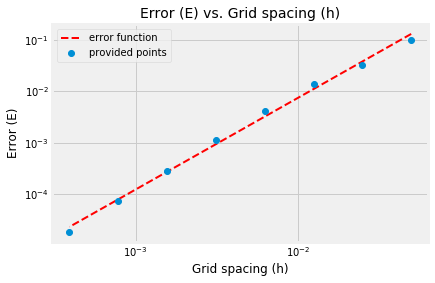

In [16]:
k = math.exp(xhat[0][0])
p = xhat[1][0]
plt.loglog(h, k*(h)**p, 'r--', label = 'error function', linewidth = 2);

plt.loglog(h, E, 'o', label = 'provided points');
plt.title('Error (E) vs. Grid spacing (h)', fontsize = 14);
plt.xlabel('Grid spacing (h)', fontsize = 12);
plt.ylabel('Error (E)', fontsize = 12);
plt.legend();